In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('amusement_accidents.db')

In [3]:
query = 'SELECT * FROM accidents'

df = pd.read_sql(query, conn)

df.head()

,acc_id,acc_date,acc_state,acc_city,fix_port,source,bus_type,industry_sector,device_category,device_type,...,gender,acc_desc,injury_desc,report,category,mechanical,op_error,employee,notes,year
0,1007272,2009-04-05,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,cars & track rides,Track ride,...,F,Patron's attorney stated that she had a right ...,Right vertegral artery tear,0,Illness or neurological symptoms,0,0,0,0,2009
1,918972,2009-02-05,FL,Naples,P,Florida Dept. of Agriculture,Carnival or rental,amusement ride,pendulum,Flying carpet ride,...,F,17-yo female was ejected from the ride mid-cyl...,Multiple broken ribs and bruised lung,https://saferparksdata.org/sites/default/files...,Fall: ejection/fall from ride,1,0,0,"This was the third ejection on this ride, unde...",2009
2,919123,2008-11-08,CA,Buena Park,F,California Division of Occupational Safety and...,Amusement park,amusement ride,coaster,Coaster - steel,...,M,Guest injured right hand while riding.,Injured hand. Treated at local hospital.,0,Unknown (not enough info),0,0,0,0,2008
3,919095,2008-11-01,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,"Guest stated when she sat down in the vehicle,...",Nosebleed. Treated at local hospital.,0,Illness or neurological symptoms,0,0,0,0,2008
4,919094,2008-10-29,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,Guest stated she felt lightheaded and experien...,"Dizziness, high blood pressure. Treated at lo...",0,Illness or neurological symptoms,0,0,0,0,2008


In [4]:
df.columns

Index(['acc_id', 'acc_date', 'acc_state', 'acc_city', 'fix_port', 'source',
       'bus_type', 'industry_sector', 'device_category', 'device_type',
       'tradename_or_generic', 'manufacturer', 'num_injured', 'age_youngest',
       'gender', 'acc_desc', 'injury_desc', 'report', 'category', 'mechanical',
       'op_error', 'employee', 'notes', 'year'],
      dtype='object')

The following section creates a copy of the dataframe to be manipulated into a format for anymaps.

In [5]:
kaylie_df = df

In [6]:
us_states = ['AL',
'AK',
'AZ',
'AR',
'CA',
'CO',
'CT',
'DE',
'FL',
'GA',
'HI',
'ID',
'IL',
'IN',
'IA',
'KS',
'KY',
'LA',
'ME',
'MD',
'MA',
'MI',
'MN',
'MS',
'MO',
'MT',
'NE',
'NV',
'NH',
'NJ',
'NM',
'NY',
'NC',
'ND',
'OH',
'OK',
'OR',
'PA',
'RI',
'SC',
'SD',
'TN',
'TX',
'UT',
'VT',
'VA',
'WA',
'WV',
'WI',
'WY']

In [7]:
accidents_by_state = kaylie_df.groupby('acc_state').size()
acc_by_state = []
for state, acc in accidents_by_state.items():
    state_sum = {'id': f'US.{state}',
                 'value': acc}
    acc_by_state.append(state_sum)
print(acc_by_state)

[{'id': 'US.AR', 'value': 3}, {'id': 'US.AZ', 'value': 1}, {'id': 'US.CA', 'value': 3407}, {'id': 'US.CO', 'value': 107}, {'id': 'US.CT', 'value': 11}, {'id': 'US.FL', 'value': 1070}, {'id': 'US.GA', 'value': 1}, {'id': 'US.IA', 'value': 14}, {'id': 'US.IL', 'value': 152}, {'id': 'US.IN', 'value': 8}, {'id': 'US.KY', 'value': 37}, {'id': 'US.LA', 'value': 1}, {'id': 'US.MA', 'value': 13}, {'id': 'US.MD', 'value': 66}, {'id': 'US.MI', 'value': 265}, {'id': 'US.MO', 'value': 6}, {'id': 'US.NC', 'value': 14}, {'id': 'US.NJ', 'value': 5646}, {'id': 'US.NV', 'value': 31}, {'id': 'US.NY', 'value': 69}, {'id': 'US.OH', 'value': 81}, {'id': 'US.OK', 'value': 154}, {'id': 'US.PA', 'value': 269}, {'id': 'US.RI', 'value': 5}, {'id': 'US.TN', 'value': 1}, {'id': 'US.TX', 'value': 3320}, {'id': 'US.VA', 'value': 2}, {'id': 'US.WA', 'value': 8}, {'id': 'US.WI', 'value': 111}, {'id': 'US.WV', 'value': 11}]


In [8]:
acc_breakdown = kaylie_df.groupby('acc_state')
state_dfs = []
for name, group in acc_breakdown:
    new_group = {'city': group['acc_city'].values,
                 'date': group['acc_date'].values,
                 'type': group['device_type'].values,
                 'description': group['acc_desc'].values}
    group_dict = {'state': f'US.{name}',
                 'accs': new_group}
    state_dfs.append(group_dict)
print(state_dfs)

[{'state': 'US.AR', 'accs': {'city': array(['Stuttgart', 'Little Rock', 'Hot Springs'], dtype=object), 'date': array(['2007-11-21', '2007-06-17', '2006-07-29'], dtype=object), 'type': array(['Orbiter/octopus-type', 'Trabant', 'Coaster - steel'], dtype=object), 'description': array(["10-year-old boy's jacket or shirtsleeve became entangled in the machinery.  The spinning action of the ride pulled the clothing farther into the machinery, eventually pulling the child's whole body out of the car and entrapping him within the moving parts of the machine.  When the ride was finally stopped, the boy's limbs were caught in the gears.",
       '11-yo boy ejected from the Wipe Out.  The operator had not installed lap belts as required by manufacturer.',
       'Adult patron ejected from coaster during ride.'], dtype=object)}}, {'state': 'US.AZ', 'accs': {'city': array(['Prescott Valley'], dtype=object), 'date': array(['2003-11-01'], dtype=object), 'type': array(['Sizzler/scrambler'], dtype=objec

In [16]:
vickieDF = df[["age_youngest","num_injured","gender","year"]]
vickieDF

,age_youngest,num_injured,gender,year
0,44.0,1,F,2009
1,17.0,1,F,2009
2,19.0,1,M,2008
3,51.0,1,F,2008
4,38.0,1,F,2008
...,...,...,...,...
14879,0.0,1,F,1988
14880,0.0,1,F,1988
14881,0.0,1,F,1988
14882,15.0,1,M,1987


In [17]:
agegroup = vickieDF[["age_youngest","num_injured","gender","year"]]

bins= [0,1,11,21,31,41,51,61,200]
labels = ['0','01-10','11-20','21-30','31-40','41-50','51-60','60+']
agegroup['AgeGroup'] = pd.cut(agegroup['age_youngest'], bins=bins, labels=labels, right=False)
print (agegroup)

       age_youngest  num_injured gender  year AgeGroup
0              44.0            1      F  2009    41-50
1              17.0            1      F  2009    11-20
2              19.0            1      M  2008    11-20
3              51.0            1      F  2008    51-60
4              38.0            1      F  2008    31-40
...             ...          ...    ...   ...      ...
14879           0.0            1      F  1988        0
14880           0.0            1      F  1988        0
14881           0.0            1      F  1988        0
14882          15.0            1      M  1987    11-20
14883          30.0            1      F  1986    21-30

[14884 rows x 5 columns]


In [18]:
barchartdf = agegroup.groupby(['AgeGroup','gender']).num_injured.sum().reset_index()
barchartdf

,AgeGroup,gender,num_injured
0,0,F,722
1,0,M,506
2,0,U,2465
3,01-10,F,1849
4,01-10,M,1908
5,01-10,U,327
6,11-20,F,1998
7,11-20,M,1405
8,11-20,U,313
9,21-30,F,798


In [19]:
scatterDF = agegroup.groupby('age_youngest').num_injured.sum().reset_index()
scatterDF

,age_youngest,num_injured
0,0.0,3693
1,1.0,41
2,2.0,177
3,3.0,284
4,4.0,375
...,...,...
85,86.0,3
86,87.0,1
87,88.0,1
88,90.0,1


In [20]:
age_cat_df = df.groupby('category').age_youngest.mean().reset_index()

age_cat_df.head()

,category,age_youngest
0,Abrupt stop/drop/lurch,22.537037
1,Awkward landing,0.000000
2,Body pain (normal motion),22.277075
3,Burn (includes friction burn),12.693182
4,"Choking, water inhalation, suffocation",8.821429


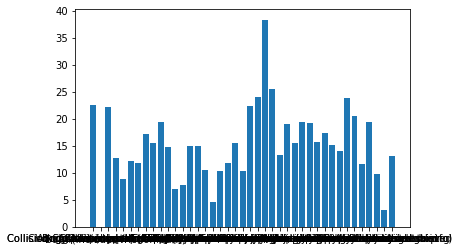

In [9]:
plt.bar(age_cat_df.category, age_cat_df.age_youngest)

plt.show()

In [10]:
# visualization 1: Here we are checking to see the value counts to be included in the pie chart
device_category_pie = df["device_category"].value_counts()
device_category_pie

water slide           3530
coaster               2748
spinning              1988
go-kart               1767
water ride            1163
cars & track rides    1025
aquatic play           465
other attraction       451
play equipment         403
pendulum               318
vertical drop          252
float attraction       187
wave device            178
inflatable             151
challenge activity      96
unknown                 87
alpine activity         41
trampoline              33
laser tag                1
Name: device_category, dtype: int64

In [ ]:
#the dict to jsonify
acc_by_device = []
for device, acc in accidents_by_state.items():
    device_sum = {'device': device,
                 'numAccs': acc}
    acc_by_device.append(device_sum)

In [11]:
# visualization 1: These will be the labels for our pie chart
device_name = ["water slide", "coaster", "spinning", "go-kart", "water ride", "cars & track rides ", "aquatic play", 
               "play equipment", "pendulum" ,"other attraction"]

# visualization 1: This will be the data represented in the pie chart
device_count = [3530, 2748, 1988, 1767, 1163, 1025, 465, 403, 318, 1477]

([<matplotlib.patches.Wedge at 0x1ffcf0bd550>,
 [Text(0.8085344442816362, 0.7458364783316689, 'water slide'),
  Text(-0.5267848338764768, 0.965659224984535, 'coaster'),
  Text(-1.0971686449034916, 0.0788730919936334, 'spinning'),
  Text(-0.8263983643278622, -0.7259929362164855, 'go-kart'),
  Text(-0.2524305086479041, -1.0706441230884147, 'water ride'),
  Text(0.25107447274247174, -1.0709629354637302, 'cars & track rides '),
  Text(0.5700495003983819, -0.9407675414764028, 'aquatic play'),
  Text(0.7319047922623555, -0.8211670810884947, 'play equipment'),
  Text(0.8479314993431221, -0.7007226073288382, 'pendulum'),
  Text(1.046977063813935, -0.3374003969285627, 'other attraction')],
 [Text(0.4410187877899833, 0.40681989727181933, '23.72%'),
  Text(-0.28733718211444187, 0.5267232136279282, '18.46%'),
  Text(-0.5984556244928135, 0.04302168654198185, '13.36%'),
  Text(-0.4507627441788339, -0.3959961470271739, '11.87%'),
  Text(-0.13768936835340223, -0.5839877035027716, '7.81%'),
  Text(0.13

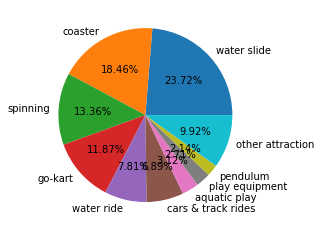

In [12]:
# visualization 1: pie chart that shows the top 10 device categories
plt.pie(device_count, labels = device_name, autopct='%1.2f%%')

In [13]:
# visualization 2: This is the dataframe that will be used for the D3 table
Table_df = pd.DataFrame(df, columns = ["acc_id", "acc_date", "acc_city", "source", "device_type","gender","acc_desc", "injury_desc"])

In [14]:
# Visualization 2: checking that dataframe works
Table_df

,acc_id,acc_date,acc_city,source,device_type,gender,acc_desc,injury_desc
0,1007272,2009-04-05,Anaheim,California Division of Occupational Safety and...,Track ride,F,Patron's attorney stated that she had a right ...,Right vertegral artery tear
1,918972,2009-02-05,Naples,Florida Dept. of Agriculture,Flying carpet ride,F,17-yo female was ejected from the ride mid-cyl...,Multiple broken ribs and bruised lung
2,919123,2008-11-08,Buena Park,California Division of Occupational Safety and...,Coaster - steel,M,Guest injured right hand while riding.,Injured hand. Treated at local hospital.
3,919095,2008-11-01,Anaheim,California Division of Occupational Safety and...,Spinning cups/tubs,F,"Guest stated when she sat down in the vehicle,...",Nosebleed. Treated at local hospital.
4,919094,2008-10-29,Anaheim,California Division of Occupational Safety and...,Spinning cups/tubs,F,Guest stated she felt lightheaded and experien...,"Dizziness, high blood pressure. Treated at lo..."
...,...,...,...,...,...,...,...,...
14879,898651,1988-02-20,0,Texas Dept. of Insurance,Plane/jet/helicopter,F,Swelling,Swelling
14880,898649,1988-01-11,0,Texas Dept. of Insurance,Train/tram,F,Fell while getting out of ride.,Contusion
14881,898650,1988-01-11,0,Texas Dept. of Insurance,Train/tram,F,Tripped while exiting ride.,Strain
14882,898648,1987-04-19,Amarillo,Texas Dept. of Insurance,Coaster - steel,M,Jumped into the roller coaster car as the ride...,Fatal


In [10]:
#keep this cell at the end of the document
conn.close()